In [102]:
import math
import numpy as np
from qiskit import (
    QuantumCircuit,
    ClassicalRegister,
    QuantumRegister,
    execute,
    Aer,
    BasicAer
    )
from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
import matplotlib.pyplot as plt
import random
import qiskit

In [103]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.0', 'qiskit-aer': '0.8.0', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.12.2', 'qiskit-aqua': '0.9.0', 'qiskit': '0.25.0'}

# Definizione dei sign flip

$$\operatorname{SF}_{N,j} = O_j (C^NZ) O_j$$

$$O_j = \otimes_{l=0}^{N-1} (\operatorname{NOT}_l)^{1-j_l}$$

Choose $N$ and $j$. $j$ represents the elements of the computational basis.

In [104]:
N=4

In [105]:
inputVector = np.zeros(2**N)
inputVector[0] = 1
inputVector
# weightVector = [0,0,0,0,0,1,0,0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [106]:
base_computazionale = np.zeros((2**N,N))
for i in range(2**N):
    for cifra in range(N):
        base_computazionale[i][cifra] = format(i, '0'+str(N)+'b')[N-1-cifra]

print(base_computazionale)

# format(2,'0'+str(N)+'b')[2]

[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 0. 1. 1.]
 [0. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [107]:
q = QuantumRegister(N, 'q')

In [108]:
def O(circuit, N, j):
    O_circ = QuantumCircuit(q)
    for l in range(N):
        if j[l] == 0:
            O_circ.x(q[l])
    circuit += O_circ

def sf(circuit, N, j):
    SF = QuantumCircuit(q)
    O(SF, N, j)
    SF.barrier(q)
    SF.mcrz(np.pi, q[:N-1], q[N-1])
    SF.barrier(q)
    O(SF, N, j)
    
    circuit += SF

In [109]:
def U_i(circuit, inputVector):
    """
    Funione per codificare il vettore d'input.
    Da chiamare dentro il circuito principale.
    """
    u_i = QuantumCircuit(q)
    u_i.h(q)
    for (index, value) in enumerate(inputVector):
        # print("U_i, passo " + str(index))
        if inputVector[index]: sf(u_i, N, base_computazionale[index])
    circuit += u_i

In [110]:
def U_w(circuit, weightVector):
    """
    Funione per codificare il vettore dei pesi.
    Da chiamare dentro il circuito principale.
    """
    u_w = QuantumCircuit(q)
    for (index, value) in enumerate(weightVector):
        # print("U_w, passo " + str(index))
        if weightVector[index]: sf(u_w, N, base_computazionale[index])
    u_w.h(q)
    u_w.x(q)
    circuit += u_w

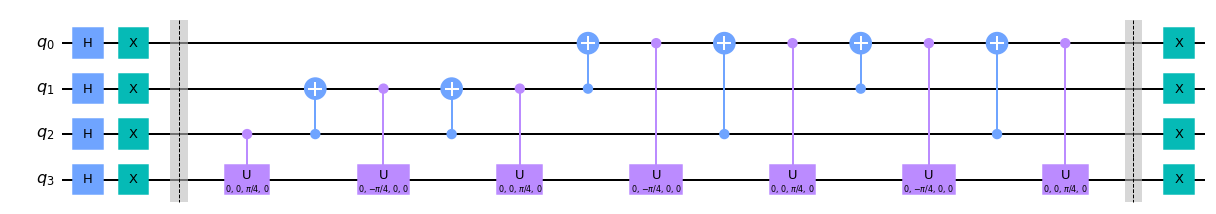

In [111]:
circ = QuantumCircuit(q)
U_i(circ, inputVector)
circ.draw(output='mpl')
# mcrz(self, lam, q_controls, q_target, use_basis_gates=False)

In [112]:
%matplotlib inline
def draw_state_vector(circ):
    """
        Input: 
            - circ (qiskit.circuit.quantumcircuit.QuantumCircuit) quantum circuit 
              to be executed
        Description:
            - Runs the quantum circuit and prints the resulting quantum state vector 
              and draws the circuit.
    """
    
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    result = job.result()
    output_state = result.get_statevector(circ, decimals=2)
    print("state vector after circuit:", output_state)
    return circ.draw(output='mpl')

In [113]:
inputVector

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

[0, 0, 0, 0, 0, 0, 0, 1]
state vector after circuit: [ 0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j
 -0.25-0.j  0.25-0.j  0.25-0.j  0.25-0.j  0.25-0.j  0.25-0.j  0.25-0.j
  0.25-0.j  0.25-0.j]


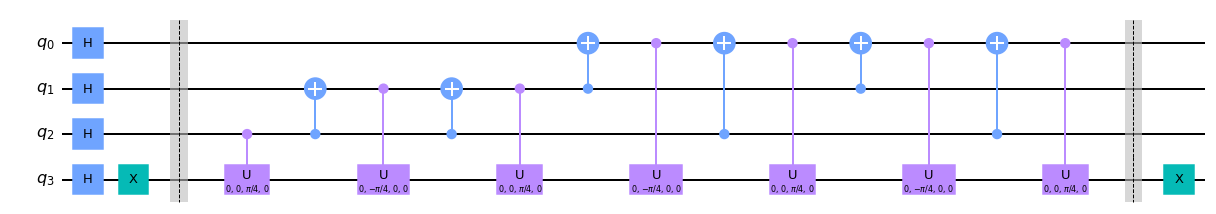

In [114]:
inputVector = [0,0,0,0,0,0,0,1]
circ = QuantumCircuit(q)
U_i(circ, inputVector)
print(inputVector)
draw_state_vector(circ)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
state vector after circuit: [ 0.25-0.j  0.25-0.j  0.25-0.j  0.25-0.j  0.25-0.j  0.25-0.j  0.25-0.j
  0.25-0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j
  0.25+0.j -0.25-0.j]


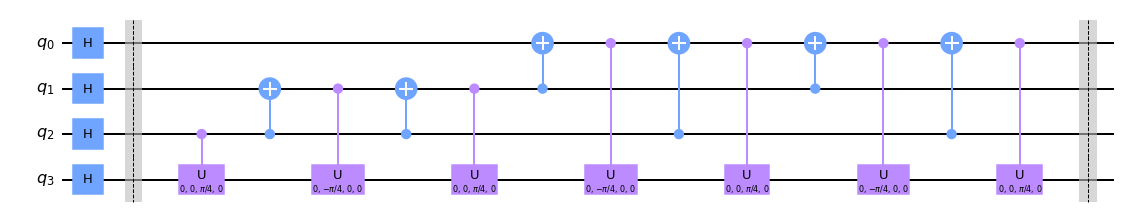

In [115]:
inputVector = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]
circ = QuantumCircuit(q)
U_i(circ, inputVector)
print(inputVector)
draw_state_vector(circ)

[0, 0, 0, 0, 0, 1, 0, 0]
state vector after circuit: [ 0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j -0.25-0.j  0.25+0.j
  0.25+0.j  0.25+0.j  0.25+0.j  0.25-0.j  0.25-0.j  0.25+0.j  0.25+0.j
  0.25+0.j  0.25+0.j]


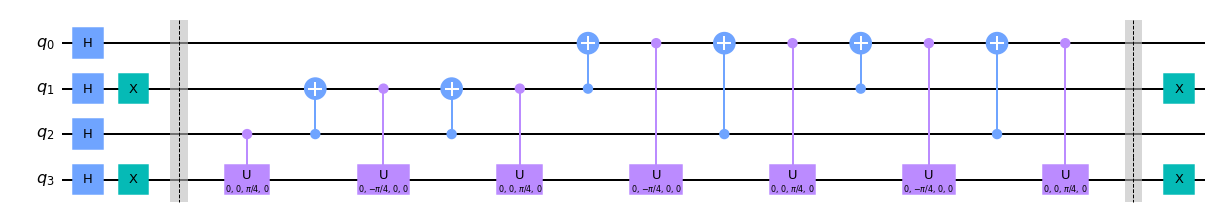

In [116]:
inputVector = [0,0,0,0,0,1,0,0]
circ = QuantumCircuit(q)
U_i(circ, inputVector)
print(inputVector)
draw_state_vector(circ)

[0, 0, 0, 0, 0, 1, 0, 0]
state vector after circuit: [ 0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j -0.25-0.j  0.25+0.j
  0.25+0.j  0.25+0.j  0.25+0.j  0.25-0.j  0.25-0.j  0.25+0.j  0.25+0.j
  0.25+0.j  0.25+0.j]


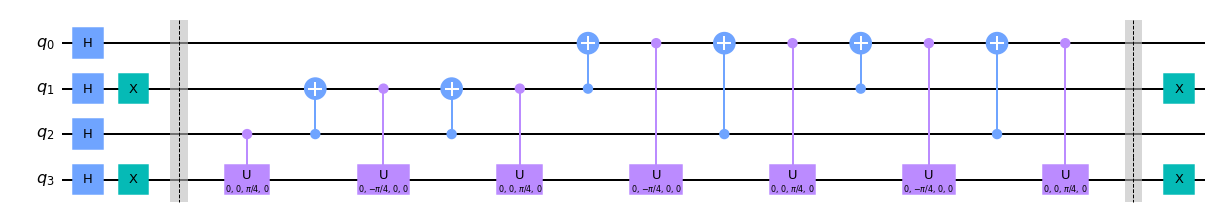

In [117]:
print(inputVector)
circ = QuantumCircuit(q)
U_i(circ, inputVector)
draw_state_vector(circ)

[0, 0, 0, 0, 0, 1, 0, 0]
state vector after circuit: [ 0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j -0.25-0.j  0.25+0.j
  0.25+0.j  0.25+0.j  0.25+0.j  0.25-0.j  0.25-0.j  0.25+0.j  0.25+0.j
  0.25+0.j  0.25+0.j]


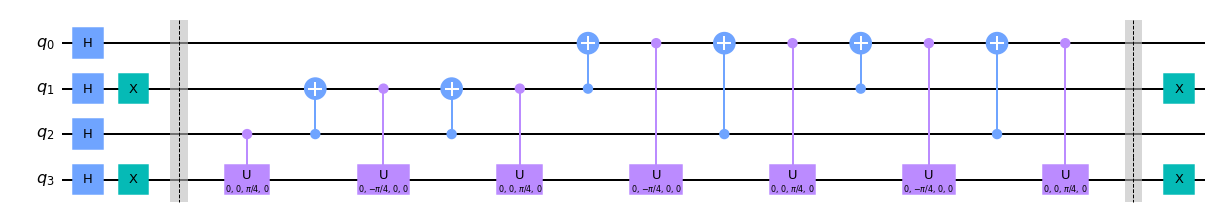

In [118]:
print(inputVector)
circ = QuantumCircuit(q)
U_i(circ, inputVector)
draw_state_vector(circ)

# Esecuzione del circuito completo

In [57]:
inputVector = [1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

weightVector = [0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [59]:
def numtovect(k,N):
    m = 2**N
    v = np.zeros(m)
    binary_string = ("{:0%db}"%m).format(k)
    #convert k to an m-digit binary number
    #print(binary_string)
    v = list(map(lambda v, b : v**int(b), v, binary_string)) 
    return np.array(v)

state vector after circuit: [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.-1.j]


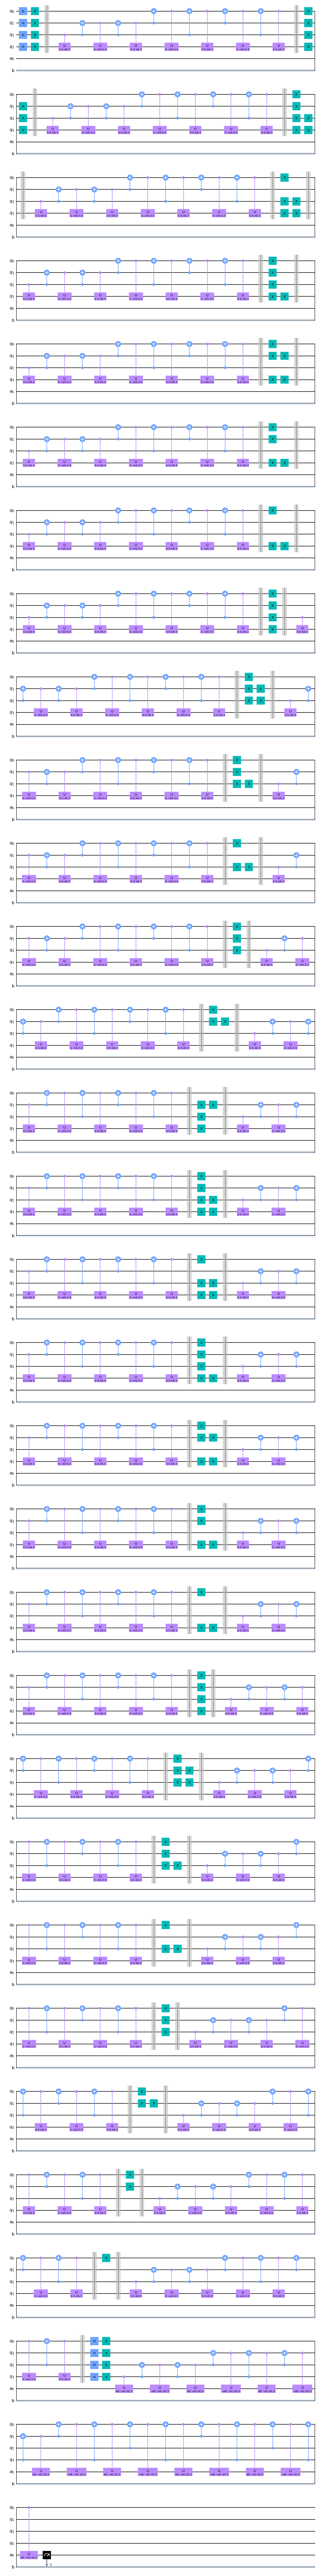

In [60]:
q = QuantumRegister(N, 'q')
a = QuantumRegister(1, 'a')
b = ClassicalRegister(1, 'b')
circ = QuantumCircuit(q,a,b)
U_i(circ, numtovect(3,N))
U_w(circ, weightVector)
# (theta, q_controls, q_target, use_basis_gates=False)
circ.mcrx(np.pi, q, a[0])
circ.measure(a, b)

draw_state_vector(circ)

In [61]:
q = QuantumRegister(N, 'q')
a = QuantumRegister(1, 'a')
b = ClassicalRegister(1, 'b')
circ = QuantumCircuit(q,a,b)
U_i(circ, numtovect(0,N))
U_w(circ, numtovect(4, N))
# (theta, q_controls, q_target, use_basis_gates=False)
circ.mcrx(np.pi, q, a[0])
circ.measure(a, b)

# draw_state_vector(circ)

simulator = Aer.get_backend('qasm_simulator')
job = execute(circ, simulator, shots=1024)
result = job.result()
counts = result.get_counts(circ)
print("\nTotal counts are:",counts)
# plot_histogram(counts)


Total counts are: {'0': 257, '1': 767}


In [62]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circ, simulator, shots=1024)
result = job.result()
counts = result.get_counts(circ)
print("\nTotal counts are:",counts)
# plot_histogram(counts)


Total counts are: {'0': 241, '1': 783}


In [63]:
counts.get('0')

241

In [64]:
numtovect(0,4)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [87]:
from datetime import datetime, timedelta

timedelta(minutes=10)

datetime.timedelta(seconds=600)

In [91]:
start = datetime.now()

In [92]:
end = datetime.now()

In [93]:
end - start

datetime.timedelta(seconds=2, microseconds=440490)

# Input vs weights matrix

Below we compare all the input vectors against all the weight vectors, for a specified $N$. We're computing a square matrix with a side of $2^{2^N}$ elements.

Start with $N=2$ to see results within your lifetime.

The results are saved in **outcomes**, and can be viewed in an image in the cell below.

In [78]:
N = 2

base_computazionale = np.zeros((2**N,N))
for i in range(2**N):
    for cifra in range(N):
        base_computazionale[i][cifra] = format(i, '0'+str(N)+'b')[N-1-cifra]
base_computazionale

startTime = datetime.now()
print(datetime.now().time())
outcomes = np.zeros((2**(2**N),2**(2**N)))
for i in range(2**(2**N)):
    forTime0 = datetime.now()
    print("Vettore d'input #" + str(i))
    for w in range(2**(2**N)):
        q = QuantumRegister(N, 'q')
        a = QuantumRegister(1, 'a')
        b = ClassicalRegister(1, 'b')
        circ = QuantumCircuit(q,a,b)
        # print('Input vector: ' + str(numtovect(i,N)) + ' - Weight vector: ' + str(numtovect(w,N)))
        U_i(circ, numtovect(i,N))
        U_w(circ, numtovect(w, N))
        # (theta, q_controls, q_target, use_basis_gates=False)
        circ.mcrx(np.pi, q, a[0])
        circ.measure(a, b)

        # draw_state_vector(circ)

        simulator = Aer.get_backend('qasm_simulator')
        job = execute(circ, simulator, shots=1024)
        result = job.result()
        counts = result.get_counts(circ)
        #print("\nTotal counts are:",counts)
        # plot_histogram(counts)
        if len(counts) == 1:
            outcomes[i][w] = int([*counts][0]) # unpacking
        else:
            outcomes[i][w] = counts['1']/float(1024)
    forTime1 = datetime.now()
    print("Tempo per un vettore d'input: " + str(forTime1 - forTime0))
endTime = datetime.now()
print(datetime.now().time())
print('Tempo passato: ' + str(endTime - startTime))

00:19:51.482543
Vettore d'input #0
Tempo per un vettore d'input: 0:00:03.844484
Vettore d'input #1
Tempo per un vettore d'input: 0:00:03.716151
Vettore d'input #2
Tempo per un vettore d'input: 0:00:04.083368
Vettore d'input #3
Tempo per un vettore d'input: 0:00:03.571153
Vettore d'input #4
Tempo per un vettore d'input: 0:00:03.714245
Vettore d'input #5
Tempo per un vettore d'input: 0:00:03.630836
Vettore d'input #6
Tempo per un vettore d'input: 0:00:03.992217
Vettore d'input #7
Tempo per un vettore d'input: 0:00:03.404985
Vettore d'input #8
Tempo per un vettore d'input: 0:00:03.488431
Vettore d'input #9
Tempo per un vettore d'input: 0:00:03.403673
Vettore d'input #10
Tempo per un vettore d'input: 0:00:03.047172
Vettore d'input #11
Tempo per un vettore d'input: 0:00:02.947202
Vettore d'input #12
Tempo per un vettore d'input: 0:00:03.377566
Vettore d'input #13
Tempo per un vettore d'input: 0:00:03.309038
Vettore d'input #14
Tempo per un vettore d'input: 0:00:03.053896
Vettore d'input #15

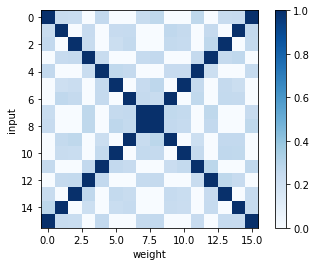

In [94]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#ax.matshow(outcomes, cmap=plt.cm.Blues)
ax.set_xlabel("weight")
ax.set_ylabel("input")

out_plot = ax.imshow(outcomes, cmap='Blues', interpolation='none')
fig.colorbar(out_plot, ax=ax)

# fig.savefig('inputs_v_weights_N=2.png', dpi=1000)

In [80]:
#import dill
#filename = 'citymap_N3.pkl'
#dill.dump_session(filename)

# and to load the session again:
# dill.load_session(filename)

In [74]:
(numtovect(34,3))

array([1., 1., 0., 1., 1., 1., 0., 1.])

In [95]:
# N = 3
# vectors = [numtovect(k,N) for k in range(2**(2**N))]
# for i, v in enumerate(vectors):
#     print("k=",i," ", v)

In [97]:
# c_cir(N,inputVector, weightVector)

In [98]:
# Tempi in funzione di N
# N - Tempo totale - Tempo medio per vettore d'input (riga)
# 2 - 0:00:15.781950 - 0:00:01.236381 * 16
# 3 - 4:24:20.956383 - 0:01:16.679671 * 256
# 4 - ?:??:??.?????? -  * 65536